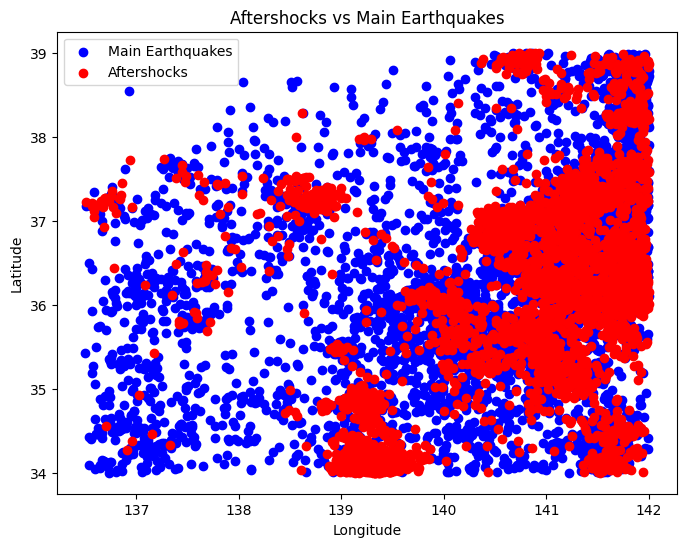

                       time  latitude  longitude   Type
0 1968-02-25 20:00:32+00:00    37.586    141.650  False
1 1968-05-19 04:12:38+00:00    35.626    141.955  False
2 1968-07-01 10:45:12+00:00    35.999    139.348  False
3 1968-08-08 04:55:10+00:00    36.363    141.587  False
4 1969-04-09 12:57:25+00:00    36.825    139.853  False
5 1969-05-13 14:19:43+00:00    36.400    140.736  False
6 1969-07-23 13:14:36+00:00    37.360    141.669  False
7 1969-09-09 05:15:38+00:00    35.794    137.063  False
8 1970-04-16 01:55:57+00:00    34.579    141.629  False
9 1971-01-04 21:08:55+00:00    34.530    137.151  False


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset dari URL
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kaggle/Adeli_Panakkat_Reyes/usgs_japan_1968_2018.csv"
data = pd.read_csv(url)

# Sorting data berdasarkan waktu gempa dari yang terbaru
data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')

# Fungsi untuk menentukan apakah suatu gempa adalah aftershock
def is_aftershock(curr_index, delta_time_threshold, delta_distance_threshold):
    current_event = data.iloc[curr_index]
    for i in range(curr_index - 1, -1, -1):  # Iterasi mundur untuk mencari gempa sebelumnya
        previous_event = data.iloc[i]
        delta_time = (current_event['time'] - previous_event['time']).total_seconds()
        delta_distance = ((current_event['latitude'] - previous_event['latitude'])**2 +
                          (current_event['longitude'] - previous_event['longitude'])**2)**0.5
        if delta_time <= delta_time_threshold and delta_distance <= delta_distance_threshold:
            return True  # Jika terdapat gempa sebelumnya dalam threshold, dianggap aftershock
    return False  # Jika tidak ada gempa sebelumnya dalam threshold, dianggap bukan aftershock

# Parameter untuk threshold waktu (dalam detik) dan jarak (dalam derajat)
delta_time_threshold = 24 * 60 * 60  # Misalnya, threshold waktu 24 jam
delta_distance_threshold = 1.0  # Misalnya, threshold jarak 1 derajat

# Tentukan label untuk setiap gempa
aftershock_labels = []
for i in range(len(data)):
    aftershock_labels.append(is_aftershock(i, delta_time_threshold, delta_distance_threshold))

# Tambahkan kolom 'Type' yang menandai gempa utama atau aftershock
data['Type'] = aftershock_labels

# Scatter plot untuk visualisasi
main_earthquakes = data[data['Type'] == False]
aftershocks = data[data['Type'] == True]

plt.figure(figsize=(8, 6))
plt.scatter(main_earthquakes['longitude'], main_earthquakes['latitude'], color='blue', label='Main Earthquakes')
plt.scatter(aftershocks['longitude'], aftershocks['latitude'], color='red', label='Aftershocks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Aftershocks vs Main Earthquakes')
plt.legend()
plt.show()

# Tampilkan beberapa data dengan label gempa utama atau aftershock
print(data[['time', 'latitude', 'longitude', 'Type']].head(10))  # Ganti angka 10 dengan jumlah data yang ingin ditampilkan


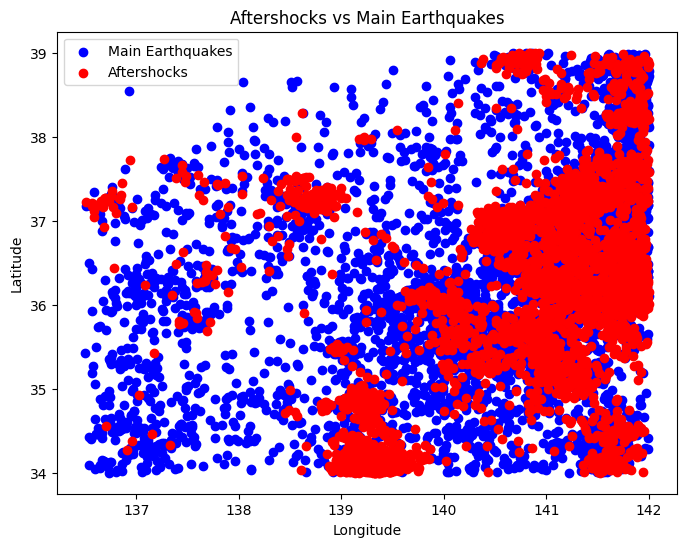

                       time  latitude  longitude   Type
0 1968-02-25 20:00:32+00:00    37.586    141.650  False
1 1968-05-19 04:12:38+00:00    35.626    141.955  False
2 1968-07-01 10:45:12+00:00    35.999    139.348  False
3 1968-08-08 04:55:10+00:00    36.363    141.587  False
4 1969-04-09 12:57:25+00:00    36.825    139.853  False
5 1969-05-13 14:19:43+00:00    36.400    140.736  False
6 1969-07-23 13:14:36+00:00    37.360    141.669  False
7 1969-09-09 05:15:38+00:00    35.794    137.063  False
8 1970-04-16 01:55:57+00:00    34.579    141.629  False
9 1971-01-04 21:08:55+00:00    34.530    137.151  False
Jumlah Gempa Utama (Mainshock): 5518
Jumlah Aftershock: 3700


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset dari URL
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kaggle/Adeli_Panakkat_Reyes/usgs_japan_1968_2018.csv"
data = pd.read_csv(url)

# Sorting data berdasarkan waktu gempa dari yang terbaru
data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')

# Fungsi untuk menentukan apakah suatu gempa adalah aftershock
def is_aftershock(curr_index, delta_time_threshold, delta_distance_threshold):
    current_event = data.iloc[curr_index]
    for i in range(curr_index - 1, -1, -1):  # Iterasi mundur untuk mencari gempa sebelumnya
        previous_event = data.iloc[i]
        delta_time = (current_event['time'] - previous_event['time']).total_seconds()
        delta_distance = ((current_event['latitude'] - previous_event['latitude'])**2 +
                          (current_event['longitude'] - previous_event['longitude'])**2)**0.5
        if delta_time <= delta_time_threshold and delta_distance <= delta_distance_threshold:
            return True  # Jika terdapat gempa sebelumnya dalam threshold, dianggap aftershock
    return False  # Jika tidak ada gempa sebelumnya dalam threshold, dianggap bukan aftershock

# Parameter untuk threshold waktu (dalam detik) dan jarak (dalam derajat)
delta_time_threshold = 24 * 60 * 60  # Misalnya, threshold waktu 24 jam
delta_distance_threshold = 1.0  # Misalnya, threshold jarak 1 derajat

# Tentukan label untuk setiap gempa
aftershock_labels = []
for i in range(len(data)):
    aftershock_labels.append(is_aftershock(i, delta_time_threshold, delta_distance_threshold))

# Tambahkan kolom 'Type' yang menandai gempa utama atau aftershock
data['Type'] = aftershock_labels

# Scatter plot untuk visualisasi
main_earthquakes = data[data['Type'] == False]
aftershocks = data[data['Type'] == True]

plt.figure(figsize=(8, 6))
plt.scatter(main_earthquakes['longitude'], main_earthquakes['latitude'], color='blue', label='Main Earthquakes')
plt.scatter(aftershocks['longitude'], aftershocks['latitude'], color='red', label='Aftershocks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Aftershocks vs Main Earthquakes')
plt.legend()
plt.show()

# Tampilkan beberapa data dengan label gempa utama atau aftershock
print(data[['time', 'latitude', 'longitude', 'Type']].head(10))  # Ganti angka 10 dengan jumlah data yang ingin ditampilkan

# Menghitung jumlah mainshock dan jumlah aftershock
mainshock_count = data['Type'].value_counts()[False]
aftershock_count = data['Type'].value_counts()[True]

# Menampilkan jumlah gempa utama dan aftershock
print(f"Jumlah Gempa Utama (Mainshock): {mainshock_count}")
print(f"Jumlah Aftershock: {aftershock_count}")
